In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

import utils as utils

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

%reload_ext autoreload
%autoreload 2

In [8]:
def customAccuracy(predicted, actual, accuracy):
    total = 0
    true = 0
    for i,y in zip(predicted,actual):
        temp = y * accuracy/100
        bottomRange = y - temp
        topRange = y + temp
        if (i > bottomRange and i < topRange):
            true += 1
            total += 1
        else:
            total += 1
            
    return true/total

In [3]:
url1 = "https://raw.githubusercontent.com/MikePlekan/Real-Estate-project/Michael/data.csv"
url2 = "https://raw.githubusercontent.com/MikePlekan/Real-Estate-project/Michael/sales.csv"

df = pd.read_csv(url1)
sales = pd.read_csv(url2)
df['prices'] = sales['saleamt']
df = df.dropna(axis=0)
df

,Unnamed: 0,countrySubd,locality,attomId,saleTransDate,proptype,yearbuilt,universalsize,beds,bathstotal,zipcode,prices
0,0,VA,GREAT FALLS,411548,2019-05-29,SFR,1984.0,2784.0,3.0,4.0,22066,882500
1,1,VA,GREAT FALLS,468091,2005-05-25,SFR,1976.0,1524.0,4.0,3.0,22066,770000
2,2,VA,GREAT FALLS,468092,2014-02-12,SFR,1989.0,5618.0,6.0,6.0,22066,1587500
3,3,VA,GREAT FALLS,532098,2020-02-25,SFR,1980.0,2224.0,4.0,4.0,22066,765000
4,4,VA,GREAT FALLS,652221,2009-12-23,SFR,2013.0,5988.0,5.0,7.0,22066,715000
...,...,...,...,...,...,...,...,...,...,...,...,...
3834,3834,CT,WEST HARTFORD,3016337,2020-08-28,DUPLEX,1918.0,3030.0,6.0,3.0,6119,417500
3837,3837,CT,WEST HARTFORD,3016334,2021-09-17,DUPLEX,1918.0,3450.0,8.0,4.0,6119,440000
3839,3839,CT,WEST HARTFORD,3016332,2022-04-21,TRIPLEX,1916.0,2800.0,7.0,3.0,6119,455000
3840,3840,CT,WEST HARTFORD,3016331,2022-02-10,DUPLEX,1917.0,1944.0,6.0,2.0,6119,403000


The price for the data is: $385000.0
The Q1 for the data is: $179675.0
The Q2 for the data is: $736875.0
The IQR for the data is: $557200.0


Text(0.5, 0, 'Price ($)')

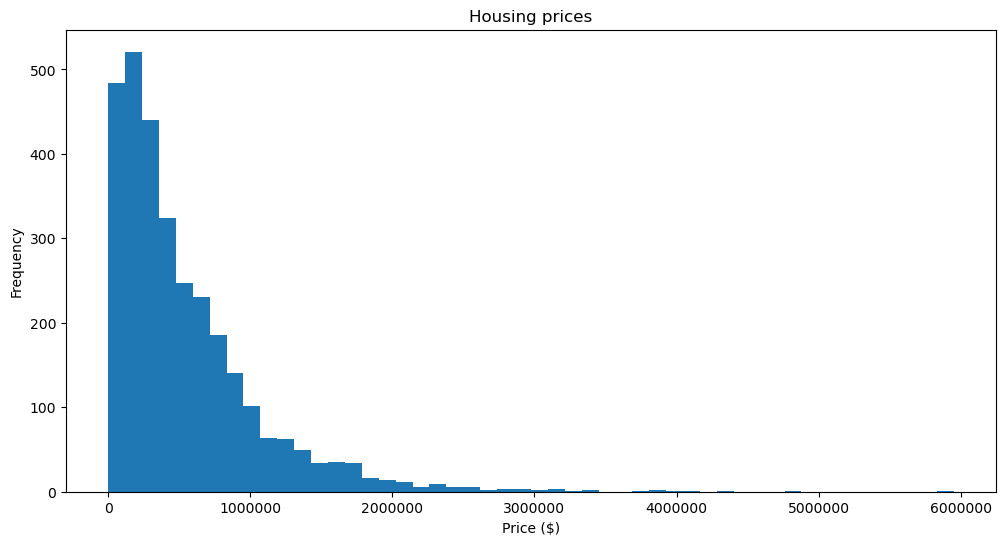

In [68]:
price = df['prices']
median = np.median(price)
q3,q1 = np.percentile(price,[75 ,25])
print(f"The price for the data is: ${median}")
print(f"The Q1 for the data is: ${q1}")
print(f"The Q2 for the data is: ${q3}")
print(f"The IQR for the data is: ${q3-q1}")

fig, ax = plt.subplots()
df['prices'].plot.hist(bins=50, figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
plt.title("Housing prices")
plt.xlabel("Price ($)")

#ax.set_xlim([0, 200000])

In [5]:
min(price)

281

Coefficient of determination: 0.2846
corr coeff:                   0.5335
corr coeff^2:                 0.2846
The intercept for the line-of-best-fit is 1687.21
The slope for the line-of-best-fit is     269.47


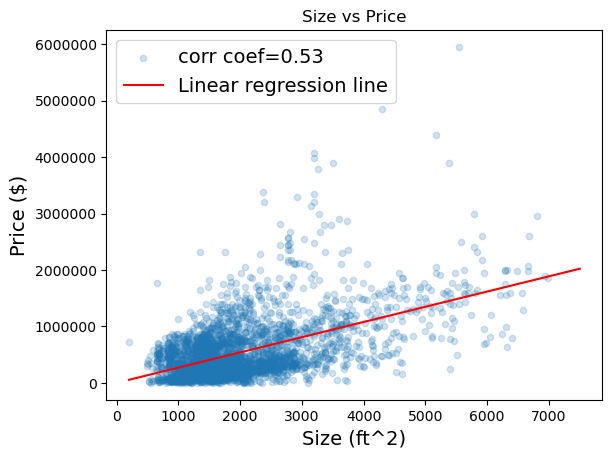

In [28]:
# Model
model = LinearRegression()

x = df['universalsize'].values.reshape(-1,1)
y = df['prices'].values

# Perform regression
model.fit(x,y)

# Calculate r^2
r_sq = model.score(x, y)
print(f'Coefficient of determination: {r_sq:.4f}')

cc = df[['universalsize','prices']].corr().iloc[0][1]
print(f'corr coeff:                   {cc:.4f}')
print(f'corr coeff^2:                 {cc**2:.4f}')

# Slope and intercept of the line-of-best-fit
print(f"The intercept for the line-of-best-fit is {model.intercept_:.2f}")
print(f"The slope for the line-of-best-fit is     {model.coef_[0]:.2f}")

# The equation for a line is
# y = mx + b
b = model.intercept_
m = model.coef_
xpts = np.linspace(200,7500)
ypts = m*xpts + b

# Plotting
df.plot.scatter(x = 'universalsize' ,y = 'prices',label=f'corr coef={cc:.2f}', alpha=0.2)
plt.title("Size vs Price")
plt.xlabel(f"Size (ft^2)", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)
plt.plot(xpts,ypts,'r-', label='Linear regression line')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(fontsize=14)

# HistGradientBoosting

In [9]:
X_trainHist, X_testHist, y_trainHist, y_testHist = train_test_split(df[['yearbuilt','universalsize','beds','bathstotal','zipcode']],df['prices'], test_size=0.6, random_state=42)

clf = HistGradientBoostingClassifier()

clf.fit(X_trainHist, y_trainHist)

predicationsHist = clf.predict(X_testHist)

accuracy = metrics.adjusted_rand_score(y_testHist, predicationsHist)

print(f"accuracy: {accuracy:.2f}")
customAccuracy(predicationsHist, y_testHist, 10)

accuracy: 0.00


0.09961685823754789

In [11]:
checkHist = pd.DataFrame(y_testHist)
checkHist['predicitons'] = predicationsHist
checkHist['percent'] = ((predicationsHist-y_testHist)/y_testHist)*100
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [23]:
print(customAccuracy(predicationsHist, y_testHist, 20))
checkHist.head(15)

0.2019704433497537


,prices,predicitons,percent
301,1700000,1295000,-23.82
3249,565000,232000,-58.94
141,915000,1300000,42.08
577,489900,120000,-75.51
1162,70000,131500,87.86
2443,60000,400000,566.67
2103,240000,91000,-62.08
2904,88000,191000,117.05
2689,62000,191000,208.06
840,1055000,480000,-54.50


# Regression

In [24]:
X_trainReg, X_testReg, y_trainReg, y_testReg = train_test_split(df[['yearbuilt','universalsize','beds','bathstotal','zipcode']],df['prices'], test_size=0.6, random_state=42)

regr = MLPRegressor(random_state=42,max_iter = 5000).fit(X_trainReg, y_trainReg)
predictionsReg = regr.predict(X_testReg)

regr.score(X_testReg, y_testReg)

0.37675907623612004

In [25]:
checkReg = pd.DataFrame(y_testReg)
checkReg['predicitons'] = predictionsReg
checkReg['percent'] = ((predictionsReg-y_testReg)/y_testReg)*100
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [27]:
print(customAccuracy(predictionsReg, y_testReg, 20))
checkReg.head(15)

0.18773946360153257


,prices,predicitons,percent
301,1700000,1384052.91,-18.59
3249,565000,460693.10,-18.46
141,915000,618033.22,-32.46
577,489900,586564.43,19.73
1162,70000,271889.42,288.41
2443,60000,270415.52,350.69
2103,240000,113431.89,-52.74
2904,88000,296432.35,236.85
2689,62000,314474.00,407.22
840,1055000,757309.22,-28.22


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


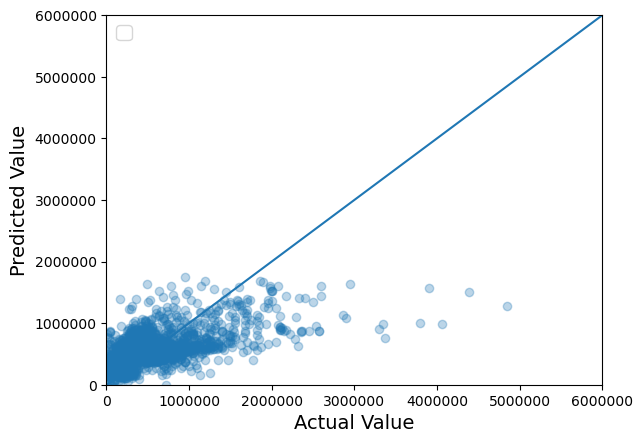

In [50]:
fig, ax = plt.subplots()
ax.set_ylim([0, 6000000])
ax.set_xlim([0, 6000000])
plt.scatter(y_testReg, predictionsReg, alpha = 0.3) 
plt.xlabel(f"Actual Value", fontsize=14)
plt.ylabel("Predicted Value", fontsize=14)
ax.axline((0, 0), slope=1)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.legend(fontsize=14)